# Projeto da disciplina PTC-3467 - Grupo 4

## Etapa de caracterização, análise e preparação dos dados


Autores: 

<pre>
Bruno Scatolini                    NUSP: 9836930

Gabriel Alencar Jeronimo Antonio   NUSP: 9923295

Henrique Luigi Caverni Barreto     NUSP: 8606278
</pre>

# Objetivo

O projeto tem como finalidade o desenvolvimento de um sistema de recomendação de filmes para usuários. A etapa descrita neste documento engloba a análise, caracterização e preparação dos dados a serem utilizados.

# 1) Caracterização dos dados


&nbsp; &nbsp; &nbsp; &nbsp; Para que o conjunto de dados possa ser preparado corretamente, necessita-se compreender o que os atributos representam e, em seguida, deve-se calcular estatísticas descritivas como média, moda, quartis e desvio padrão a fim de verificar se os dados são balanceados e a existência de _outliers_. Esta etapa é denominada caracterização dos dados.

## Descrição dos atributos

&nbsp; &nbsp; &nbsp; &nbsp; Os dados a seguir foram retirados do site MovieLens, o qual é um sistema de recomendação de  filmes desenvolvido pela organização GroupLens. As informações referentes aos usuários são de cadastros feitos até o ano 2000. Há 10 atributos, os quais são:

* __UserID:__ Atributo qualitativo que representada na forma cardinal uma identificação única ao usuário. Alcance entre 1 e 6040. 


* __MovieID:__ Atributo qualitativo que representa na forma cardinal uma identificação única ao filme. Alcance entre 1 e 3952. Existem apenas 3883 filmes registrados, pois alguns índices correspondiam a títulos duplicados.


* __Rating:__ Atributo quantitativo discreto no intervalo de 1 a 5, é a forma como os usuários avaliaram o filme, sendo que 5 representa a nota máxima e 1 a nota mínima. São 1000209 avaliações no total, de modo que cada usuário possui 20 no mínimo.


* __TimeStamp:__ Atributo quantitativo discreto que representa o instante de tempo em segundos em que cada avaliação foi feita, calculado a partir de um referencial.


* __Genre:__ Atributo qualitativo que indica os gêneros de uma obra. Cada filme pode ser classificado em até 6 tipos diferentes, dados pelas 18 categorias apresentadas abaixo:


|      |           |       |
|:------:|:-----------:|:-------:|
|Action|Documentary|Mystery|
|Adventure|Drama|Romance|
|Animation|Fantasy|Sci-Fi|
|Children's|Film-Noir|Thriller|
|Comedy|Horror|War|
|Crime|Musical|Western|


* __Title:__ Atributo qualitativo que contém os títulos dos filmes escritos de maneira idêntica ao IMDB (incluindo o ano de lançamento).


* __Age:__ Atributo quantitativo discreto para representar a idade do usuário por faixas, através da seguinte tabela:


|      |           |
|:------:|:-----------:|
|1|“Abaixo dos 18”|
|18|“18-24”|
|25|“25-34”|
|35|“35-44”|
|45|“45-49”|
|50|“50-55”|
|56|“56+”|


* __Gender:__ Atributo qualitativo que indica o gênero do usuário, sendo “F” feminino e “M” masculino.


* __Occupation:__ Atributo qualitativo representado através de um número natural entre 0 e 20 para mostrar a profissão do usuário, de acordo com a tabela abaixo:


|      |           |
|:------:|:-----------:|
|0|"other" or not specified|
|1|"academic/educator"|
|2|"artist"|
|3|"clerical/admin"|
|4|"college/grad student"|
|5|"customer service"|
|6|"doctor/health care"|
|7|"executive/managerial"|
|8|"farmer"|
|9|"homemaker"|
|10|"K-12 student"|
|11|"lawyer"|
|12|"programmer"|
|13|"retired"|
|14|"sales/marketing"|
|15|"scientist"|
|16|"self-employed"|
|17|"technician/engineer"|
|18|"tradesman/craftsman"|
|19|"unemployed"|
|20|"writer"|


* __Zipcode:__ Atributo qualitativo que mostra o código postal americano do usuário

## Análise exploratória por meio de estatísticas descritivas

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# Estas linhas de código servem apenas para o funcionamento do script no Google Colaboratory
# Devem ser descomentadas quando os arquivos necessários não estiverem no diretório "Arquivos" do Google Colaboratory 

#from google.colab import files
#uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving users.csv to users.csv


Após a importação das bibliotecas necessárias, é preciso criar estruturas de dados (_dataframes_) por meio da leitura dos arquivos _movies_, _ratings_ e _users_, os quais estão em formato .csv e possuem todos os atributos mencionados acima.

In [ ]:
movies_data = pd.read_csv(r'movies.csv',
        sep=r'\s*;\s*',
        engine='python')
ratings_data = pd.read_csv(r'ratings.csv',
        sep=r'\s*;\s*',
        engine='python')
users_data = pd.read_csv(r'users.csv',
        sep=r'\s*;\s*',
        engine='python')

In [ ]:
movies_data

,MovieID,Title,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
0,1,Toy Story (1995),Animation,Children's,Comedy,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure,Children's,Fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy,Romance,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy,Drama,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,NaN,NaN,NaN,NaN,NaN
3879,3949,Requiem for a Dream (2000),Drama,NaN,NaN,NaN,NaN,NaN
3880,3950,Tigerland (2000),Drama,NaN,NaN,NaN,NaN,NaN
3881,3951,Two Family House (2000),Drama,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings_data

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
users_data

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,1060


Com relação ao documento _movies.csv_, percebe-se que é coerente analisar apenas os atributos referentes aos 6 possíveis gêneros de um filme, já que o título e a numeração servem apenas para a identificação de uma obra, portanto cada elemento das respectivas colunas tem frequência única. 

In [ ]:
movies_data[['Genre 1','Genre 2','Genre 3','Genre 4','Genre 5','Genre 6']].describe()

,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6
count,3883,1858,536,115,15,1
unique,18,17,15,13,6,1
top,Drama,Drama,Thriller,Thriller,Thriller,War
freq,1176,381,120,40,3,1


É interessante notar que o pirmeiro e o segundo gêneros mais frequentes são drama e que mais da metade do conjunto de filmes é classificada em apenas um gênero. Para analisar a distribuição de gêneros cinematográficos, necessita-se considerar todas as 6 possíveis categorias. Como consequêcia, a soma de todas as respectivas frequências resultará em um valor maior que 3883, porém a existência de dados com mais de um gênero é algo inerente a este conjunto de dados.

In [ ]:
# Criação de um dicionário que contém os genêros cinematográficos e suas respectivas contagens, referentes ao conjunto de filmes
genres_dict = {}
genres = list(movies_data['Genre 1'].unique())
for i in range(len(genres)):
    genres_dict[genres[i]] = 0

genre_1 = movies_data['Genre 1'].value_counts()                  # Contagens das diferentes categorias presentes no primeiro gênero
genre_2 = movies_data['Genre 2'].value_counts()                  # Contagens das diferentes categorias presentes no segundo gênero
genre_3 = movies_data['Genre 3'].value_counts()                  # Contagens das diferentes categorias presentes no terceiro gênero
genre_4 = movies_data['Genre 4'].value_counts()                  # Contagens das diferentes categorias presentes no quarto gênero
genre_5 = movies_data['Genre 5'].value_counts()                  # Contagens das diferentes categorias presentes no quinto gênero
genre_6 = movies_data['Genre 6'].value_counts()                  # Contagens das diferentes categorias presentes no sexto gênero
    
for i in range(len(genres)):
    genres_dict[genres[i]] = genres_dict[genres[i]] + genre_1[genres[i]]
    
genres = list(movies_data['Genre 2'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict[genres[i]] = genres_dict[genres[i]] + genre_2[genres[i]]

genres = list(movies_data['Genre 3'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict[genres[i]] = genres_dict[genres[i]] + genre_3[genres[i]]

genres = list(movies_data['Genre 4'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict[genres[i]] = genres_dict[genres[i]] + genre_4[genres[i]]

genres = list(movies_data['Genre 5'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict[genres[i]] = genres_dict[genres[i]] + genre_5[genres[i]]

genres = list(movies_data['Genre 6'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict[genres[i]] = genres_dict[genres[i]] + genre_6[genres[i]]

Text(0.5, 1.0, 'Distribuição dos gêneros de filmes')

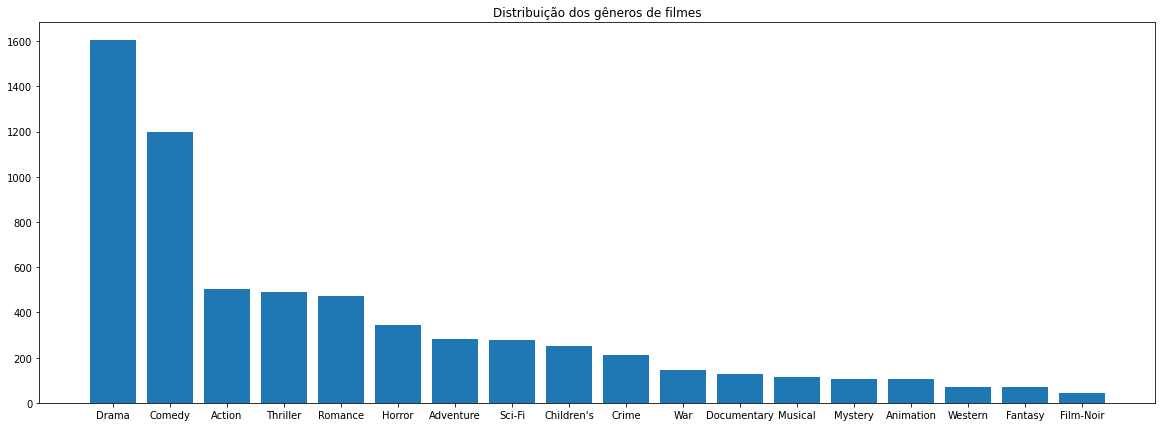

In [ ]:
# Ordenação dos items do dicionário, com base nas contagens
genres_dict = {k: v for k, v in sorted(genres_dict.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(20, 7))
plt.bar(list(genres_dict.keys()), list(genres_dict.values()))
plt.title('Distribuição dos gêneros de filmes')

Considerando os gêneros mais comuns na base de dados de filmes, nota-se que Drama, Comédia, Ação, Suspense e Romance (_Drama_, _Comedy_, _Action_, _Thriller_ e _Romance_) são aqueles com frequência maior que 10 %, sendo que os dois primeiros compõem 41,28 % e 30,90 % do acervo, respectivamente.

Após a contagem de todos os filmes que pertencem a cada um dos gêneros, pode-se estimar a relavância de cada categoria com relação ao primeiro, segundo, terceiro, quarto, quinto e sexto gêneros.

In [ ]:
genres = list(movies_data['Genre 1'].unique())
# Criação de dicionários que contêm as presenças das 18 categorias, em porcentagem, nos gêneros 1, 2, 3, 4, 5 e 6
genre_1_dict = {}
genre_2_dict = {}
genre_3_dict = {}
genre_4_dict = {}
genre_5_dict = {}
genre_6_dict = {}
for i in range(len(genres)):
    genre_1_dict[genres[i]] = 0
    genre_2_dict[genres[i]] = 0
    genre_3_dict[genres[i]] = 0
    genre_4_dict[genres[i]] = 0
    genre_5_dict[genres[i]] = 0
    genre_6_dict[genres[i]] = 0

# Exemplo do cálculo da presença da categoria fictícia "gen filme" no gênero j (j = 1, 2, 3, 4, 5, 6), de acordo com as variáveis presentes no script:
# total_genre_j = sum(genre_j)
# ratio = genre_j["gen filme"]/total_genre_j
# genre_j_dict["gen filme"] = ratio

for i in range(len(genres)):
    genre_1_dict[genres[i]] = genre_1[genres[i]]/sum(genre_1)
        
genres = list(movies_data['Genre 2'].unique())
for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genre_2_dict[genres[i]] = genre_2[genres[i]]/sum(genre_2)

genres = list(movies_data['Genre 3'].unique())
for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genre_3_dict[genres[i]] = genre_3[genres[i]]/sum(genre_3)

genres = list(movies_data['Genre 4'].unique())
for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genre_4_dict[genres[i]] = genre_4[genres[i]]/sum(genre_4)

genres = list(movies_data['Genre 5'].unique())
for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genre_5_dict[genres[i]] = genre_5[genres[i]]/sum(genre_5)
            
genres = list(movies_data['Genre 6'].unique())
for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genre_6_dict[genres[i]] = genre_6[genres[i]]/sum(genre_6)

# Ordenação dos dicionários            
genre_1_dict = {k: v for k, v in sorted(genre_1_dict.items(), key=lambda item: item[1], reverse=True)}
genre_2_dict = {k: v for k, v in sorted(genre_2_dict.items(), key=lambda item: item[1], reverse=True)}
genre_3_dict = {k: v for k, v in sorted(genre_3_dict.items(), key=lambda item: item[1], reverse=True)}
genre_4_dict = {k: v for k, v in sorted(genre_4_dict.items(), key=lambda item: item[1], reverse=True)}
genre_5_dict = {k: v for k, v in sorted(genre_5_dict.items(), key=lambda item: item[1], reverse=True)}
genre_6_dict = {k: v for k, v in sorted(genre_6_dict.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
print('Presença das categorias no primeiro gênero, em ordem decrescente:')
print('')
for i in genre_1_dict.keys():
    print('%s: %.2f ' % (i,genre_1_dict[i]*100), end='')
    print('%')

Presença das categorias no primeiro gênero, em ordem decrescente:

Drama: 30.29 %
Comedy: 26.37 %
Action: 12.95 %
Horror: 6.75 %
Adventure: 3.99 %
Crime: 3.37 %
Documentary: 3.17 %
Thriller: 2.60 %
Animation: 2.32 %
Children's: 2.29 %
Romance: 1.29 %
Sci-Fi: 1.18 %
Mystery: 0.93 %
Western: 0.85 %
Film-Noir: 0.64 %
Musical: 0.64 %
War: 0.31 %
Fantasy: 0.05 %


In [ ]:
print('Presença das categorias no segundo gênero, em ordem decrescente:')
print('')
for i in genre_2_dict.keys():
    print('%s: %.2f ' % (i,genre_2_dict[i]*100), end='')
    print('%')

Presença das categorias no segundo gênero, em ordem decrescente:

Drama: 20.51 %
Romance: 17.60 %
Thriller: 12.27 %
Children's: 7.91 %
Sci-Fi: 7.53 %
Comedy: 6.94 %
Adventure: 6.89 %
War: 4.20 %
Horror: 3.82 %
Crime: 3.39 %
Mystery: 2.74 %
Musical: 2.53 %
Fantasy: 1.08 %
Western: 0.97 %
Film-Noir: 0.75 %
Animation: 0.65 %
Documentary: 0.22 %
Action: 0.00 %


In [ ]:
print('Presença das categorias no terceiro gênero, em ordem decrescente:')
print('')
for i in genre_3_dict.keys():
    print('%s: %.2f ' % (i,genre_3_dict[i]*100), end='')
    print('%')

Presença das categorias no terceiro gênero, em ordem decrescente:

Thriller: 22.39 %
Romance: 15.11 %
Sci-Fi: 12.87 %
Comedy: 8.02 %
War: 7.84 %
Drama: 7.09 %
Fantasy: 6.90 %
Musical: 5.78 %
Mystery: 3.36 %
Western: 2.80 %
Crime: 2.61 %
Children's: 2.61 %
Horror: 1.12 %
Film-Noir: 0.93 %
Animation: 0.56 %
Adventure: 0.00 %
Action: 0.00 %
Documentary: 0.00 %


In [ ]:
print('Presença das categorias no quarto gênero, em ordem decrescente:')
print('')
for i in genre_4_dict.keys():
    print('%s: %.2f ' % (i,genre_4_dict[i]*100), end='')
    print('%')

Presença das categorias no quarto gênero, em ordem decrescente:

Thriller: 34.78 %
Sci-Fi: 15.65 %
Romance: 8.70 %
Musical: 8.70 %
Drama: 6.96 %
War: 6.09 %
Fantasy: 6.09 %
Comedy: 3.48 %
Horror: 3.48 %
Crime: 2.61 %
Western: 1.74 %
Children's: 0.87 %
Mystery: 0.87 %
Animation: 0.00 %
Adventure: 0.00 %
Action: 0.00 %
Documentary: 0.00 %
Film-Noir: 0.00 %


In [ ]:
print('Presença das categorias no quinto gênero, em ordem decrescente:')
print('')
for i in genre_5_dict.keys():
    print('%s: %.2f ' % (i,genre_5_dict[i]*100), end='')
    print('%')

Presença das categorias no quinto gênero, em ordem decrescente:

Thriller: 20.00 %
Romance: 20.00 %
Sci-Fi: 20.00 %
War: 20.00 %
Fantasy: 13.33 %
Musical: 6.67 %
Animation: 0.00 %
Adventure: 0.00 %
Comedy: 0.00 %
Action: 0.00 %
Drama: 0.00 %
Crime: 0.00 %
Children's: 0.00 %
Documentary: 0.00 %
Horror: 0.00 %
Western: 0.00 %
Mystery: 0.00 %
Film-Noir: 0.00 %


In [ ]:
print('Presença das categorias no sexto gênero, em ordem decrescente:')
print('')
for i in genre_6_dict.keys():
    print('%s: %.2f ' % (i,genre_6_dict[i]*100), end='')
    print('%')

Presença das categorias no sexto gênero, em ordem decrescente:

War: 100.00 %
Animation: 0.00 %
Adventure: 0.00 %
Comedy: 0.00 %
Action: 0.00 %
Drama: 0.00 %
Thriller: 0.00 %
Crime: 0.00 %
Romance: 0.00 %
Children's: 0.00 %
Documentary: 0.00 %
Sci-Fi: 0.00 %
Horror: 0.00 %
Western: 0.00 %
Mystery: 0.00 %
Film-Noir: 0.00 %
Fantasy: 0.00 %
Musical: 0.00 %


In [ ]:
genres_dict

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

Conforme foi constatado, 115 filmes possuem uma quarta classificação, 15 detêm 5 gêneros e apenas uma obra contém uma sexta categoria. Considerando que há um total de 3883 filmes, estes valores podem ser considerados desprezíveis e, portanto, pode-se analisar até o terceiro gênero e , assim, conclui-se que as categorias _Horror_, _Adventure_ e _Sci-Fi_ também possuem relevância, além de _Drama_, _Comedy_, _Action_, _Thriller_ e _Romance_. Estes resultados e o gráfico acima sugerem que a distribuição de gêneros é desbalanceada, o que pode prejudicar o algoritmo de aprendizado de máquina a ser implementado. No entanto, é preciso criar uma estrutura de dados que integra as informações de _ratings_ e _movies_ para verificar se esta inferência procede. Isso será discutido adiante.

Analisando o documento _ratings.csv_, percebe-se que é coerente calcular as estatísticas descritivas apenas para o atributo refente às avaliações, já que os demais têm como função a identificação do usuário.

In [ ]:
ratings_data['Rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribuição das avaliações dos usuários')

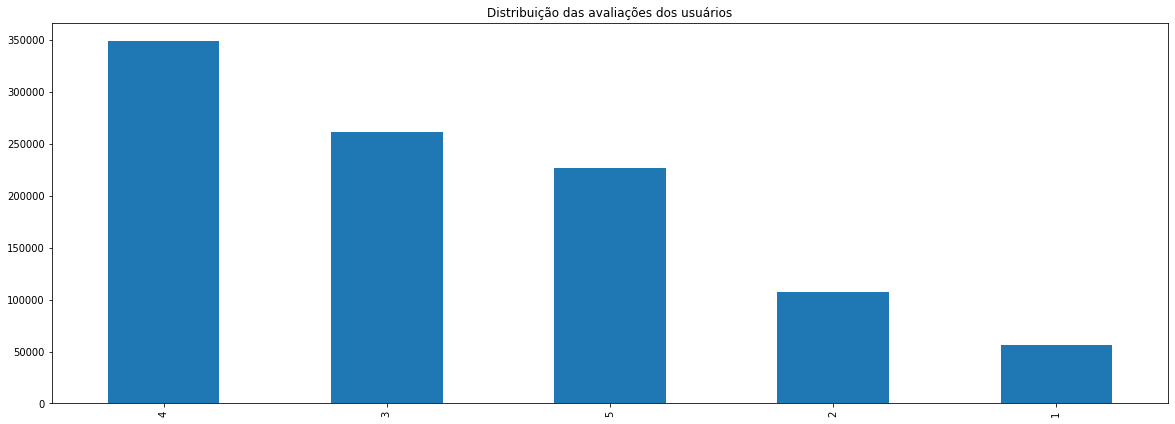

In [ ]:
plt.figure(figsize=(20, 7))
ratings_data['Rating'].value_counts().plot(kind='bar')
plt.title('Distribuição das avaliações dos usuários')

Pode-se notar que todas as avaliações são números naturais entre 1 e 5, logo a respectiva coluna de dados não possui _outliers_. Como consequência desta constatação, verifica-se que a mediana é o valor mais próximo da média, dentre os números possíveis. É interessante notar que o desvio padrão é próximo de 1, mostrando que os dados não são dispersos (este fenômeno pode ser validado visualmente no gráfico acima). Logo, conclui-se que este é um bom atributo para se utilizar durante a etapa do algoritmo de aprendizagem.

Com relação ao conjunto de dados _users_, apenas os atributos _Age_, _Gender_ e _Occupation_ são relevantes para análise estatística, sendo que as colunas restantes servem para identificação de usuários e filmes.

In [ ]:
users_data['Age'].astype('object').describe()

count     6040
unique       7
top         25
freq      2096
Name: Age, dtype: int64

Text(0.5, 1.0, 'Distribuição de faixa etária entre os usuários')

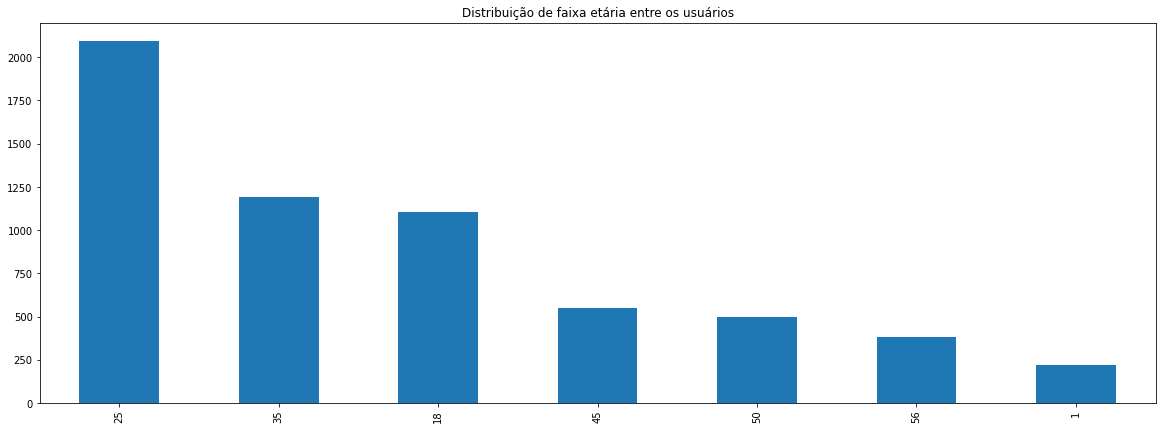

In [ ]:
plt.figure(figsize=(20,7))
users_data['Age'].value_counts().plot(kind='bar')
plt.title('Distribuição de faixa etária entre os usuários')

Nota-se que mais de 60 % dos usuários possui entre 18 e 44 anos de idade, sendo que a faixa de 25-34 é a predominante, de modo que esta destaca-se consideravelmente em relação às demais. Desconsiderando o primeiro grupo etário representado no gráfico, nota-se que há pouca dispersão entre as demais faixas, porém a grande desproporção com relação às pessoas de 25 a 34 anos prejudica o balanceamento do atributo, fazendo com que sua utilização ao longo da etapa de aprendizado não supervisionado possa piorar o desempenho do sistema de recomendação.

In [ ]:
users_data['Gender'].describe()

count     6040
unique       2
top          M
freq      4331
Name: Gender, dtype: object

Text(0.5, 1.0, 'Distribuição de gênero entre os usuários')

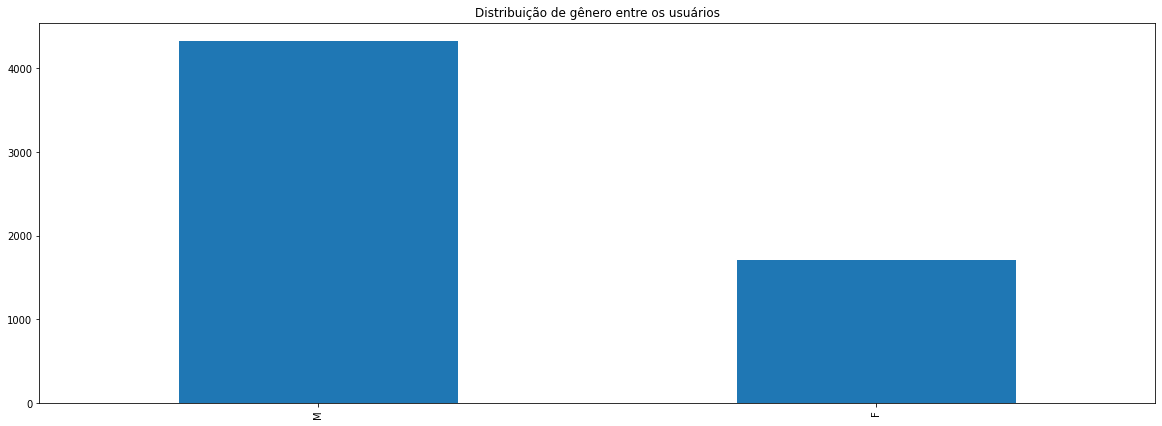

In [ ]:
plt.figure(figsize=(20,7))
users_data['Gender'].value_counts().plot(kind='bar')
plt.title('Distribuição de gênero entre os usuários')

É perceptível que há uma elevada desproporção entre usuários do sexo masculino e feminino, aumentando o risco de o atributo _Gender_ prejudicar o desempenho do recomendador de filmes através do sobreajuste (_overfitting_) com relação ao sexo masculino.

In [ ]:
users_data['Occupation'].astype('object').describe()

count     6040
unique      21
top          4
freq       759
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Distribuição de ocupação entre os usuários')

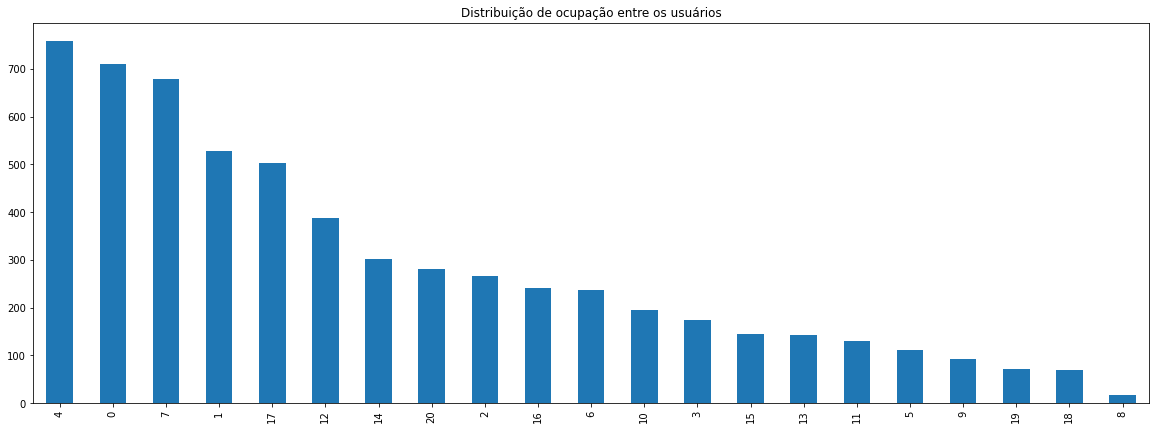

In [ ]:
plt.figure(figsize=(20,7))
users_data['Occupation'].value_counts().plot(kind='bar')
plt.title('Distribuição de ocupação entre os usuários')

Observando o gráfico acima, nota-se que a diferença entre as frequências de duas categorias consecutivas é pequena, o que implica que os dados refentes à ocupação são bem balanceados, caracterizando _Occupation_ como um bom atributo. É interessante notar que as três classificações com maior fequência são, respectivamente: estudante universitário, outro (ou não especificado) e cargo executivo, o que mostra que boa parte dos usuários preferiu não fornecer este tipo de informação.

Para tornar o possível o procedimento de preparação do conjunto de dados, utilizou-se o seguinte _script_ em _SQL_ para integrar as informações contidas em _movies_, _ratings_ e _users_ (escolheu a linguagem _SQL_ para esta tarefa pelo fato de que a mesma é mais simples de ser tratada com este recurso ao invés de _Python_):

In [ ]:
##with movies_ratings_users_data as (
##select
##	r.userid,
##	r.movieid,
##	r.rating,
##	r."TimeStamp",
##	m."Genre 1",
##	m."Genre 2",
##	m."Genre 3",
##	m."Genre 4",
##	m."Genre 5",
##	m."Genre 6",
##	m.title,
##	u.age,
##	u.gender,
##	u.occupation,
##	u.zipcode 
##from ratings r 
##left join movies_v2 m 
##on m.movieid = r.movieid 
##left join users u 
##on u.userid = r.userid)
##
##select * from movies_ratings_users_data

In [ ]:
# A linha de código abaixo deve ser descomentada quando os arquivos necessários não estiverem no diretório "Arquivos" do Google Colaboratory 

#uploaded = files.upload()

Saving moveis_ratings_users_v2_202010190853.csv to moveis_ratings_users_v2_202010190853.csv


Como resultado, o arquivo _moveis_ratings_users_v2_202010190853.csv_ foi gerado.

In [ ]:
merged_data = pd.read_csv(r'moveis_ratings_users_v2_202010190853.csv',
        sep=r'\s*;\s*',
        engine='python')

In [ ]:
merged_data

,UserID,MovieID,Rating,TimeStamp,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genre 6,Title,Age,Gender,Occupation,Zipcode
0,1,1193,5,978300760,Drama,NaN,NaN,NaN,NaN,NaN,One Flew Over the Cuckoo's Nest (1975),1,F,10,48067
1,1,661,3,978302109,Animation,Children's,Musical,NaN,NaN,NaN,James and the Giant Peach (1996),1,F,10,48067
2,1,914,3,978301968,Musical,Romance,NaN,NaN,NaN,NaN,My Fair Lady (1964),1,F,10,48067
3,1,3408,4,978300275,Drama,NaN,NaN,NaN,NaN,NaN,Erin Brockovich (2000),1,F,10,48067
4,1,2355,5,978824291,Animation,Children's,Comedy,NaN,NaN,NaN,"Bug's Life, A (1998)",1,F,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Comedy,NaN,NaN,NaN,NaN,NaN,Weekend at Bernie's (1989),25,M,6,11106
1000205,6040,1094,5,956704887,Drama,Romance,War,NaN,NaN,NaN,"Crying Game, The (1992)",25,M,6,11106
1000206,6040,562,5,956704746,Comedy,Drama,NaN,NaN,NaN,NaN,Welcome to the Dollhouse (1995),25,M,6,11106
1000207,6040,1096,4,956715648,Drama,NaN,NaN,NaN,NaN,NaN,Sophie's Choice (1982),25,M,6,11106


Retomando a discussão anterior com relação aos gêneros de filmes, agora é possível analisar a distribuição de avaliações com relação às 18 categorias.

Text(0.5, 1.0, 'Distribuição das avaliações com relação aos gêneros de filmes')

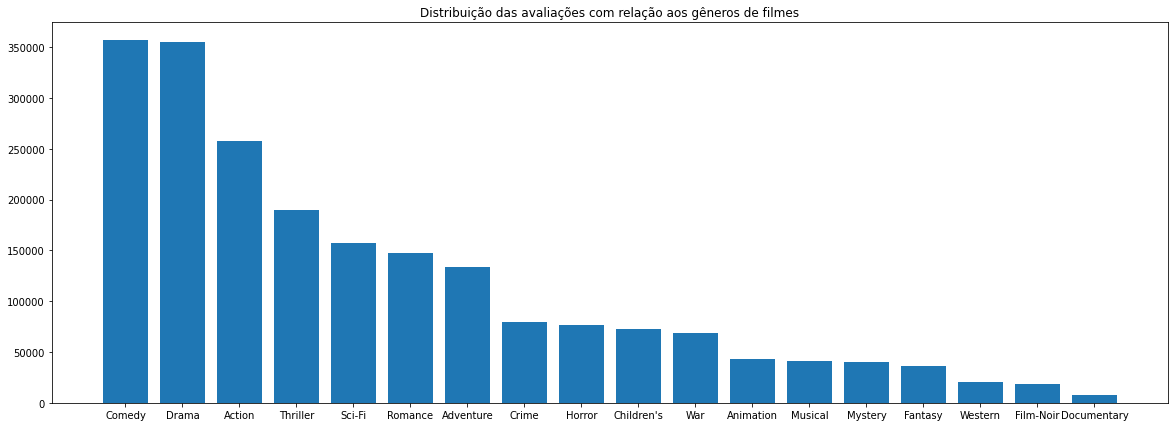

In [ ]:
# Criação de um dicionário que contém os genêros cinematográficos e suas respectivas contagens, referentes conjunto de avaliações
genres_dict_merged = {}
genres = list(merged_data['Genre 1'].unique())
for i in range(len(genres)):
    genres_dict_merged[genres[i]] = 0
    
genre_1 = merged_data['Genre 1'].value_counts()                      # Contagens das diferentes categorias presentes no primeiro gênero
genre_2 = merged_data['Genre 2'].value_counts()                      # Contagens das diferentes categorias presentes no segundo gênero                          
genre_3 = merged_data['Genre 3'].value_counts()                      # Contagens das diferentes categorias presentes no terceiro gênero
genre_4 = merged_data['Genre 4'].value_counts()                      # Contagens das diferentes categorias presentes no quarto gênero
genre_5 = merged_data['Genre 5'].value_counts()                      # Contagens das diferentes categorias presentes no quinto gênero
genre_6 = merged_data['Genre 6'].value_counts()                      # Contagens das diferentes categorias presentes no sexto gênero
    
for i in range(len(genres)):
    genres_dict_merged[genres[i]] = genres_dict_merged[genres[i]] + genre_1[genres[i]]
    
genres = list(merged_data['Genre 2'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict_merged[genres[i]] = genres_dict_merged[genres[i]] + genre_2[genres[i]]

genres = list(merged_data['Genre 3'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict_merged[genres[i]] = genres_dict_merged[genres[i]] + genre_3[genres[i]]

genres = list(merged_data['Genre 4'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict_merged[genres[i]] = genres_dict_merged[genres[i]] + genre_4[genres[i]]

genres = list(merged_data['Genre 5'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict_merged[genres[i]] = genres_dict_merged[genres[i]] + genre_5[genres[i]]

genres = list(merged_data['Genre 6'].unique())

for i in range(len(genres)):
    if (genres[i] is not np.nan):
        genres_dict_merged[genres[i]] = genres_dict_merged[genres[i]] + genre_6[genres[i]]

# Ordenação dos itens do dicionário, com base nas contagens      
genres_dict_merged = {k: v for k, v in sorted(genres_dict_merged.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(20, 7))
plt.bar(list(genres_dict_merged.keys()), list(genres_dict_merged.values()))
plt.title('Distribuição das avaliações com relação aos gêneros de filmes')

Analisando o gráfico, é notável que a distribuição das avaliações é bem balanceada, diferente do que foi observado ao calcular as frequências dos gêneros com relação à base de filmes. Isso mostra que os atributos referentes aos gêneros são adequados para o aprendizado não supervisionado, o que contradiz a suposição feita anteriormente. A única limitação imposta pela distribuição das categorias das obras é que as possíveis recomendações de filmes podem ser escassas, dependendo do gênero.

Vale ressaltar que estas frequêncais foram calculadas considerando até o sexto gênero e que a soma das mesmas resulta em mais de 1000209, devido à existência de filmes classificados em mais de uma categoria.

# 2) Preparação dos dados

Após a etapa de caracterização dos dados, necessita-se prepará-los para que possam ser utilizados para o treinamento do algoritmo não supervisionado, já que este não é um problema de classificação. Como primeiro passo, deve-se transformar os atributos categóricos em numéricos, os quais são: *Genre 1, Genre 2, Genre 3, Genre 4, Genre 5, Genre 6, Gender e Occupation*.

A coluna de dados *Gender* apresenta apenas dois rótulos, portanto basta codificá-la da seguinte forma: **M** corresponde a 1 e **F** equivale a 0.

In [ ]:
gender = np.zeros(len(merged_data['Gender']))
for i in range(len(gender)):
    if (merged_data['Gender'][i] == 'F'):
        gender[i] = 0
    else:
        gender[i] = 1

gender

array([0., 0., 0., ..., 1., 1., 1.])

Os atributos *Genre 1, Genre 2, Genre 3, Genre 4, Genre 5* e *Genre 6* devem ser substituídos por 18 colunas, de modo que as mesmas representem todos os gêneros possíveis de um filme. Para isso, os valores de cada coluna só podem ser 0 ou 1, representando ausência ou presença do gênero em algum filme, respectivamente . Note que todas as 6 categorias admissíveis para uma obra serão consideradas para a realização da transformação.

In [ ]:
genre_type = list(merged_data['Genre 1'].unique())
genres = np.zeros((len(merged_data['Genre 1']),18))

for i in range(genres.shape[0]):
    for j in range(len(genre_type)):
        if (merged_data['Genre 1'][i] == genre_type[j]):
            genres[i][j] = 1
        elif (merged_data['Genre 2'][i] == genre_type[j]):
            genres[i][j] = 1
        elif (merged_data['Genre 3'][i] == genre_type[j]):
            genres[i][j] = 1
        elif (merged_data['Genre 4'][i] == genre_type[j]):
            genres[i][j] = 1
        elif (merged_data['Genre 5'][i] == genre_type[j]):
            genres[i][j] = 1
        elif (merged_data['Genre 6'][i] == genre_type[j]):
            genres[i][j] = 1
            
genres

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

A coluna *Occupation* apresenta 21 valores diferentes (de 0 a 20) e, como cada usuário possui somente uma ocupação, basta criar 21 novas colunas com base neste atributo, de modo que o vetor linha formado para uma pessoa tenha 20 posições nulas e uma valendo 1 (técnica conhecida como *one-hot encoding*).

In [ ]:
occupations = np.zeros((len(merged_data['Occupation']),21))
index = 0

for i in range(occupations.shape[0]):
    index = merged_data['Occupation'][i]
    occupations[i][index] = 1
    
occupations

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

O atributo *Age* já é quatitativo, porém o mesmo apresenta uma varição considerável entre as faixas etárias e possui valores que são uma ordem de grandeza maiores que os dados das demais colunas. Com o intuito de solucionar este impasse, os novos grupos etários serão mapeados para os números 0, 1, 2, 3, 4, 5 e 6.

In [ ]:
age = np.zeros(len(merged_data['Age']))

for i in range(len(age)):
    if (merged_data['Age'][i] == 1):
        age[i] = 0
    elif (merged_data['Age'][i] == 18):
        age[i] = 1
    elif (merged_data['Age'][i] == 25):
        age[i] = 2
    elif (merged_data['Age'][i] == 35):
        age[i] = 3
    elif (merged_data['Age'][i] == 45):
        age[i] = 4
    elif (merged_data['Age'][i] == 50):
        age[i] = 5
    elif (merged_data['Age'][i] == 56):
        age[i] = 6
        
age

array([0., 0., 0., ..., 2., 2., 2.])

Após o processamento de todos os atributos, resta somente criar uma nova estrutura de dados que contenha estas novas colunas. Vale ressaltar que os atributos *Timestamp*, *Title* e *Zipcode* não serão incluídos, pois os mesmos têm como função a identificação de filmes e usuários, o que pode ser feito utilizando somente *MovieID* e *UserID*.

In [ ]:
# Criação de uma lista que contém os nomes das colunas de dados do dataframe a ser criado
atributes = ['UserID','MovieID','Rating']

for i in range(len(genre_type)):
    atributes.append(genre_type[i])
    
atributes.append('Age')
atributes.append('Gender')
    
for i in range(21):
    atributes.append('Occupation' + ' ' + str(i))

temp = np.zeros(len(merged_data.index))
# Criação da estrutura de dados que contém todos os atributos essenciais
training_prep = pd.DataFrame()
training_prep[0] = merged_data[atributes[0]]
training_prep[1] = merged_data[atributes[1]]
training_prep[2] = merged_data[atributes[2]]

for j in range(genres.shape[1]):
    for i in range(genres.shape[0]):
        temp[i] = genres[i][j]
    training_prep[3+j] = temp

training_prep[21] = age
training_prep[22] = gender

for j in range(occupations.shape[1]):
    for i in range(occupations.shape[0]):
        temp[i] = occupations[i][j]
    training_prep[23+j] = temp

training_prep.columns = atributes

Após o agrupamento de todos os atributos relevantes, necessita-se verificar a correlação entre os mesmos, com o intuito de evitar a ocorrência de sobreajuste durante o treinamento. Dado que deseja-se desenvolver um sistema de recomendação de filmes, existem duas abordagens possíveis: encontrar usuários semelhantes ou buscar por obras similares. Logo, deve-se analisar a correlação entre os atributos essenciais para as duas alternativas.

Começando pela técnica que envolve a similaridade entre filmes, concui-se que os atributos importantes são as notas fornecidas pelos usuários e em quais gêneros a obra se enquadra.

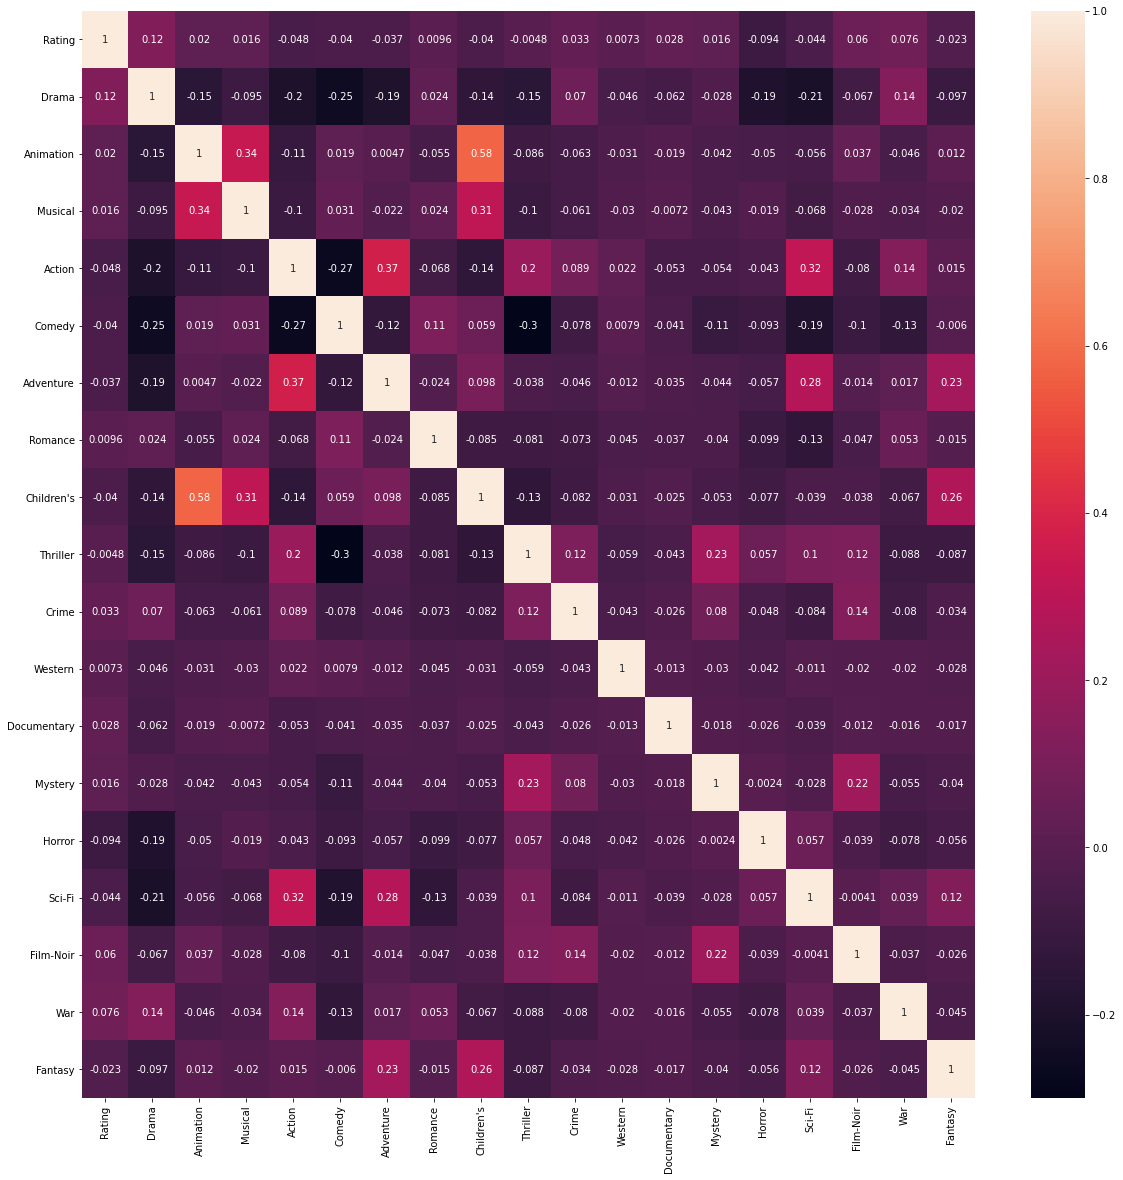

In [ ]:
# Criação de uma lista que contém os nomes das colunas de dados referentes às avaliações e aos gêneross cinematográficos
selection_1 = []

for i in range(19):
    if (i == 0):
        selection_1.append('Rating')
    else:
        selection_1.append(genre_type[i-1])

corr_matrix = training_prep[selection_1].corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corr_matrix, annot=True)
plt.show()

Analisando a matriz de correlação obtida, nota-se que as avaliações praticamente não possuem relação com os gêneros cinematográficos, o que implica que há variância desprezível entre estes atributos. No entanto, verifica-se que há correlação considrável entre algumas das 18 categorias de filmes, com destaque para *Children's* e *Animation*; *Chilndren's* e *Musical*; *Adventure* e *Action* e *Animation* e *Musical* (note que os respectivos coeficientes de correlação são positivos e, neste contexto, representam uma tendência maior de presença de ambos gêneros em uma obra). Como estas relações ocorrem para um mesmo atributo, elas na verdade contêm informações relevantes que podem ser utilizadas durante a etapa de treinamento, portanto nenhum gênero será descartado.

Considerando a identificação de usuários similares, pode-se concluir que são necessários as avalições dos filmes, a faixa etária, o sexo e a ocupação.

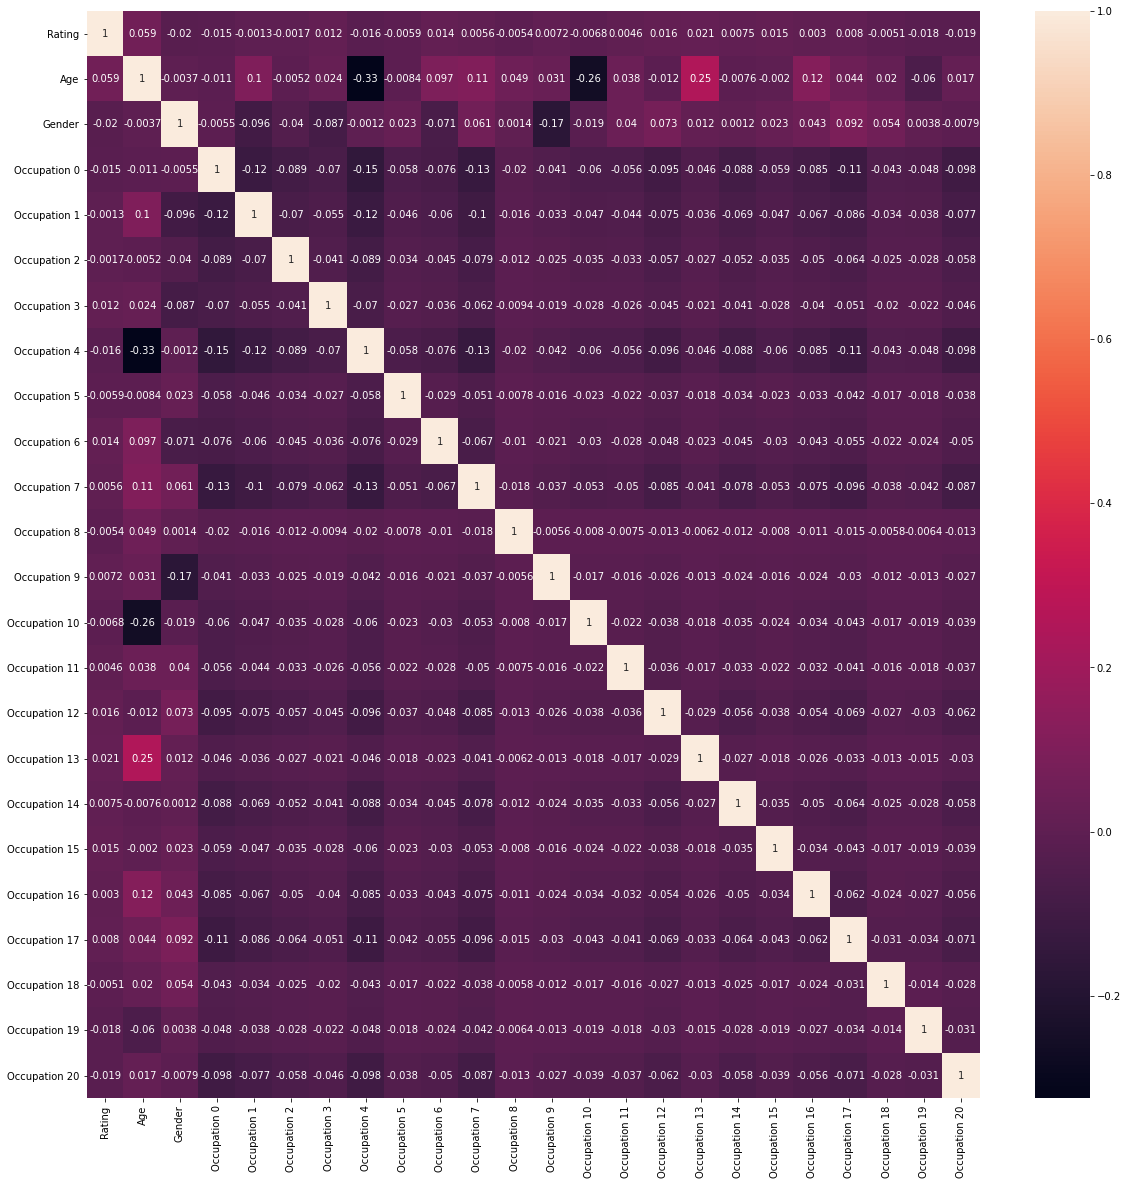

In [ ]:
# Criação de uma lista que contém os nomes das colunas de dados referentes às avaliações e aos dados dos usuários
selection_2 = []

for i in range(24):
    if (i == 0):
        selection_2.append('Rating')
    elif (i == 1):
        selection_2.append('Age')
    elif (i == 2):
        selection_2.append('Gender')
    else:
        selection_2.append('Occupation ' + str(i-3))

corr_matrix = training_prep[selection_2].corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corr_matrix, annot=True)
plt.show()

Antes de verificar as correlações entre atributos, vale mencionar que as relações entre os 21 tipos de ocupação são desprezíveis, pois utilizou-se a técnica *one-hot encoding* para transformar este atributo em numérico. Novamente, as avaliações têm correlação quase nula com *Age*, *Gender* e *Occupation*, o que é um fator positivo. Note que algumas ocupações são relacionadas com a idade (porém o módulo do coeficiente de correlação não é elevado), as quais são 4, 10 e 13, que correspondem a *college/grad student*, *K-12 student* e *retired*, respectivamente, o que é coerente com o esperado, já que a tendência é parar de estudar em instituições a partir de uma certa idade e se aposentar conforme torna-se mais velho.

Como foi constatado que há pouca ou quase nenhuma correlação entre os atributos relevantes em ambas matrizes, todas as colunas de dados processadas anteriormente serão incluídas no conjuto de dados tratado. Vale mencionar que os desbalanceamentos existentes em *Age* e *Gender* terão sua influência sobre a etapa de treinamento avaliada e, caso a interferência seja perceptível, um dos dois atributos (ou ambos) será desconsiderado. A estrutura de dados final apresenta a seguinte forma:

In [ ]:
training_prep

,UserID,MovieID,Rating,Drama,Animation,Musical,Action,Comedy,Adventure,Romance,Children's,Thriller,Crime,Western,Documentary,Mystery,Horror,Sci-Fi,Film-Noir,War,Fantasy,Age,Gender,Occupation 0,Occupation 1,Occupation 2,Occupation 3,Occupation 4,Occupation 5,Occupation 6,Occupation 7,Occupation 8,Occupation 9,Occupation 10,Occupation 11,Occupation 12,Occupation 13,Occupation 14,Occupation 15,Occupation 16,Occupation 17,Occupation 18,Occupation 19,Occupation 20
0,1,1193,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,661,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,914,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,3408,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2355,5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000205,6040,1094,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000206,6040,562,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000207,6040,1096,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
